Instalamos `seaborn` para crear gráficas atractivas.

Por defecto ya contamos con `Pandas, pyplot, numpy, scikit, matplot`

### Clustering por Hierarchy

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

In [4]:
x_cordenadas =[80.1,93.1,86.8,98.5,86.4,9.5,15.2,3.4,10.4,20.3,44.2,56.8,49.2,62.5,44.0]
y_cordenadas =[87.2,96.1,95.6,92.4,92.4,57.7,49.4,47.3,59.1,55.5,25.6,2.1,10.9,24.1,10.3]

In [5]:
df = pd.DataFrame({'x_cord': x_cordenadas,
                   'y_cord': y_cordenadas})

La función `linkage()` calcula las distancias entre los grupos intermedios con el método `ward`

La función `fcluster()` genera clusters y asigna etiquetas de clusters asocidos a una nueva columna en el dataframe


In [6]:
Z = linkage(df,'ward')
df['cluster_labels']= fcluster(Z, 3, criterion='maxclust')

Finalmente, graficamos los puntos usando seaborn con las etiquetas de cluster, como el tono para asociar clusters con diferentes colores.

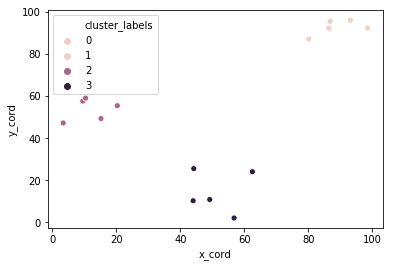

In [7]:
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_labels', data = df)
plt.show()

### Clustering por k-means

Primero, el centro de un cluster se crea aleatoramente para cada uno de los tres clusters.
Luego, la distancia al centro de esos clusters se calculan para cada punto para asignarlo al cluster más cercano. Los centros del cluster se vuelven a calcular. 

Esta iteración para re calcular el centro de los clusters se hace un predefinido número de veces.

La agrupación K-means se completa usando las funciones `kmeans` y `vq` de scipy

Los centroides de los grupos se calculan usando kmeans() y las asignaciones para cada punto se hace a través de vq(). El segundo argumento en cada método es 'distorción' la cual se captura en una variable artificial.

Finalmente se grafican los datos usando `seaborn`

In [2]:
from scipy.cluster.vq import kmeans, vq

import random
random.seed((1000,2000))

In [8]:
centroids, _ =kmeans(df,3)
df['cluster_lab'], _ =vq(df, centroids)

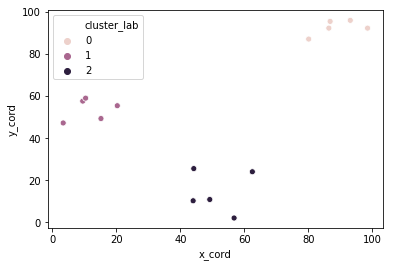

In [9]:
sns.scatterplot(x='x_cord', y='y_cord', hue='cluster_lab', data = df)
plt.show()